In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from gpu_helpers import init_all_gpu
init_all_gpu()

1 Physical GPUs, 1 Logical GPUs


In [2]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


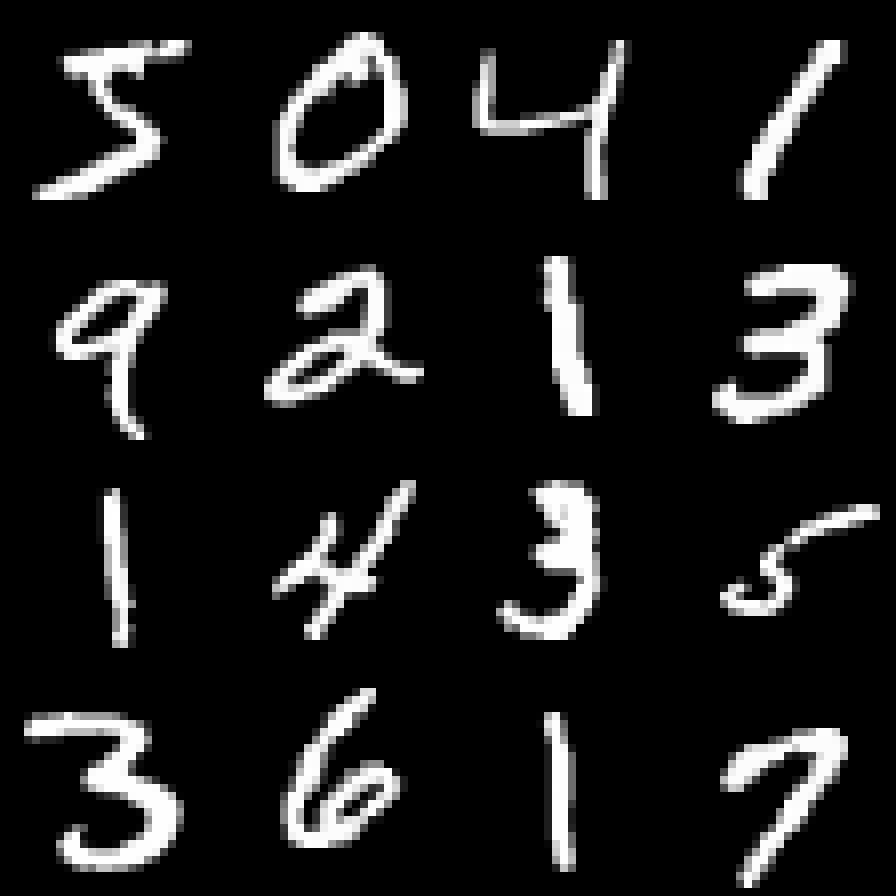

In [3]:
from IPython.display import Image
from PIL import Image
import numpy as np
a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [4]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train = x_train[:100]
y_train = y_train[:100]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


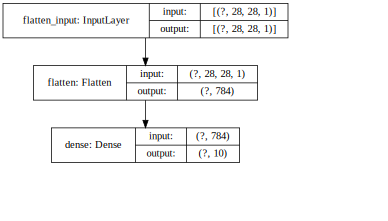

In [7]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 20

In [10]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 4ms/sample - loss: 2.4213 - accuracy: 0.1000 - val_loss: 2.3373 - val_accuracy: 0.1012
Epoch 2/20
100/100 [==============================] - 0s 1ms/sample - loss: 2.3468 - accuracy: 0.1200 - val_loss: 2.2972 - val_accuracy: 0.1166
Epoch 3/20
100/100 [==============================] - 0s 1ms/sample - loss: 2.2754 - accuracy: 0.1400 - val_loss: 2.2596 - val_accuracy: 0.1434
Epoch 4/20
100/100 [==============================] - 0s 753us/sample - loss: 2.2070 - accuracy: 0.1900 - val_loss: 2.2244 - val_accuracy: 0.1746
Epoch 5/20
100/100 [==============================] - 0s 1ms/sample - loss: 2.1415 - accuracy: 0.2800 - val_loss: 2.1913 - val_accuracy: 0.2051
Epoch 6/20
100/100 [==============================] - 0s 1ms/sample - loss: 2.0789 - accuracy: 0.3400 - val_loss: 2.1600 - val_accuracy: 0.2290
Epoch 7/20
100/100 [==============================] - 0s 1ms/sample - loss: 2.0189 - a

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.797148786354065
Test accuracy: 0.4987


In [12]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
    'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.421326
1        1  Loss auf Trainingsdaten  2.346824
2        2  Loss auf Trainingsdaten  2.275384
3        3  Loss auf Trainingsdaten  2.206970
4        4  Loss auf Trainingsdaten  2.141510
5        5  Loss auf Trainingsdaten  2.078888
6        6  Loss auf Trainingsdaten  2.018948
7        7  Loss auf Trainingsdaten  1.961509
8        8  Loss auf Trainingsdaten  1.906371
9        9  Loss auf Trainingsdaten  1.853324
10      10  Loss auf Trainingsdaten  1.802158
11      11  Loss auf Trainingsdaten  1.752677
12      12  Loss auf Trainingsdaten  1.704706
13      13  Loss auf Trainingsdaten  1.658097
14      14  Loss auf Trainingsdaten  1.612736
15      15  Loss auf Trainingsdaten  1.568539
16      16  Loss auf Trainingsdaten  1.525453
17      17  Loss auf Trainingsdaten  1.483448
18      18  Loss auf Trainingsdaten  1.442516
19      19  Loss auf Trainingsdaten  1.402659
20       0       Loss auf Testdate

In [16]:
import altair as alt
#alt.renderers.enable('notebook')

In [17]:
chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

alt.LayerChart(...)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


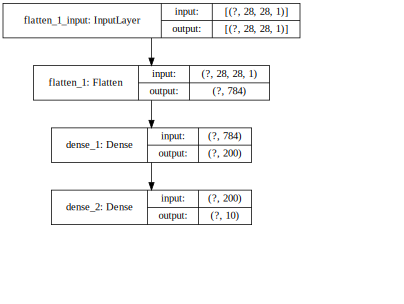

In [18]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.2838 - accuracy: 0.1000 - val_loss: 2.2101 - val_accuracy: 0.2355
Epoch 2/20
100/100 [==============================] - 0s 1ms/sample - loss: 2.0444 - accuracy: 0.3500 - val_loss: 2.1039 - val_accuracy: 0.2951
Epoch 3/20
100/100 [==============================] - 0s 1ms/sample - loss: 1.8390 - accuracy: 0.5300 - val_loss: 2.0057 - val_accuracy: 0.3711
Epoch 4/20
100/100 [==============================] - 0s 1ms/sample - loss: 1.6573 - accuracy: 0.6900 - val_loss: 1.9084 - val_accuracy: 0.4385
Epoch 5/20
100/100 [==============================] - 0s 1ms/sample - loss: 1.4906 - accuracy: 0.7700 - val_loss: 1.8106 - val_accuracy: 0.4907
Epoch 6/20
100/100 [==============================] - 0s 1ms/sample - loss: 1.3330 - accuracy: 0.8300 - val_loss: 1.7139 - val_accuracy: 0.5376
Epoch 7/20
100/100 [==============================] - 0s 1ms/sample - loss: 1.1839 - acc

In [20]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

In [21]:
evaluate(model, history)

Test loss: 1.0997013299942016
Test accuracy: 0.6699


alt.LayerChart(...)

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


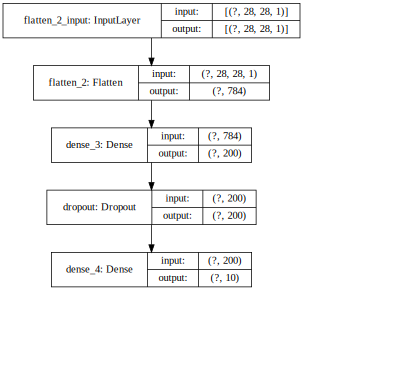

In [23]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4310 - accuracy: 0.8738 - val_loss: 0.1913 - val_accuracy: 0.9434
Epoch 2/12
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2214 - accuracy: 0.9378 - val_loss: 0.1346 - val_accuracy: 0.9604
Epoch 3/12
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1753 - accuracy: 0.9494 - val_loss: 0.1126 - val_accuracy: 0.9656
Epoch 4/12
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1492 - accuracy: 0.9566 - val_loss: 0.0951 - val_accuracy: 0.9725
Epoch 5/12
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1292 - accuracy: 0.9606 - val_loss: 0.0869 - val_accuracy: 0.9739
Epoch 6/12
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1152 - accuracy: 0.9656 - val_loss: 0.0841 - val_accuracy: 0.9758
Epoch 7/12
60000/60000 [==============================] 

In [25]:
evaluate(model, history)

Test loss: 0.06946420290686656
Test accuracy: 0.9797


alt.LayerChart(...)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               1843400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)              

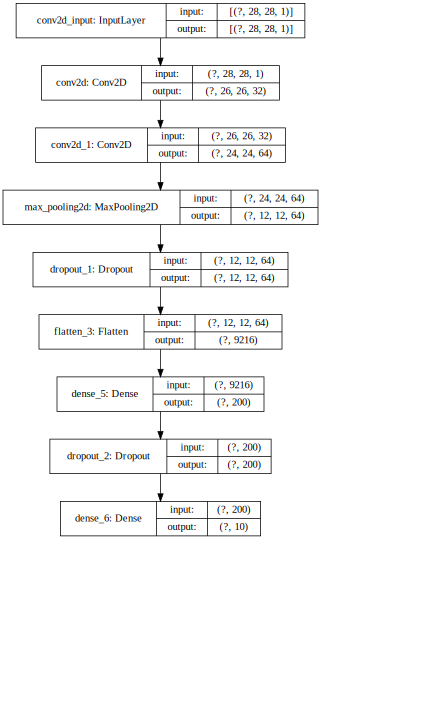

In [26]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![Struktur des Convolutional Network](Convnet.svg)

In [27]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2041 - accuracy: 0.9389 - val_loss: 0.0529 - val_accuracy: 0.9834
Epoch 2/12
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.0363 - val_accuracy: 0.9871
Epoch 3/12
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0298 - val_accuracy: 0.9897
Epoch 4/12
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0311 - val_accuracy: 0.9894
Epoch 5/12
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0342 - accuracy: 0.9888 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 6/12
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 7/12
60000/60000 [==============================] 

In [28]:
evaluate(model, history)

Test loss: 0.02594819981851531
Test accuracy: 0.9916


alt.LayerChart(...)

Schöne 3D-Visualisierung eines Convolutional Networks für MNIST: http://scs.ryerson.ca/~aharley/vis/conv/